In [1]:
from orbitflows import GsympNetFlow, polar_train, plot_aa, guess_aa_pair, H
from orbitflows.funct import DataLoader
import torch
import json
from galpy.actionAngle import actionAngleVertical
from galpy.potential import IsothermalDiskPotential
import matplotlib.pyplot as plt
import numpy as np

Example of generating and training model, using example training set for an isothermal disk

## Generate Model

In [2]:
input_dim = 2
n_epochs = 100
hidden_dim = 128
num_layers = 10

iso_flow_polar_10 = GsympNetFlow(input_dim, hidden_dim, num_layers)

# Load in Data 
Could also generate it instead. Refer to gen_load_training_data.ipynb for more information

/geir_data/scr/gabrielspace/miniforge3/envs/ML_Dyn/lib/python3.12/site-packages/orbitflows/funct/load.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(

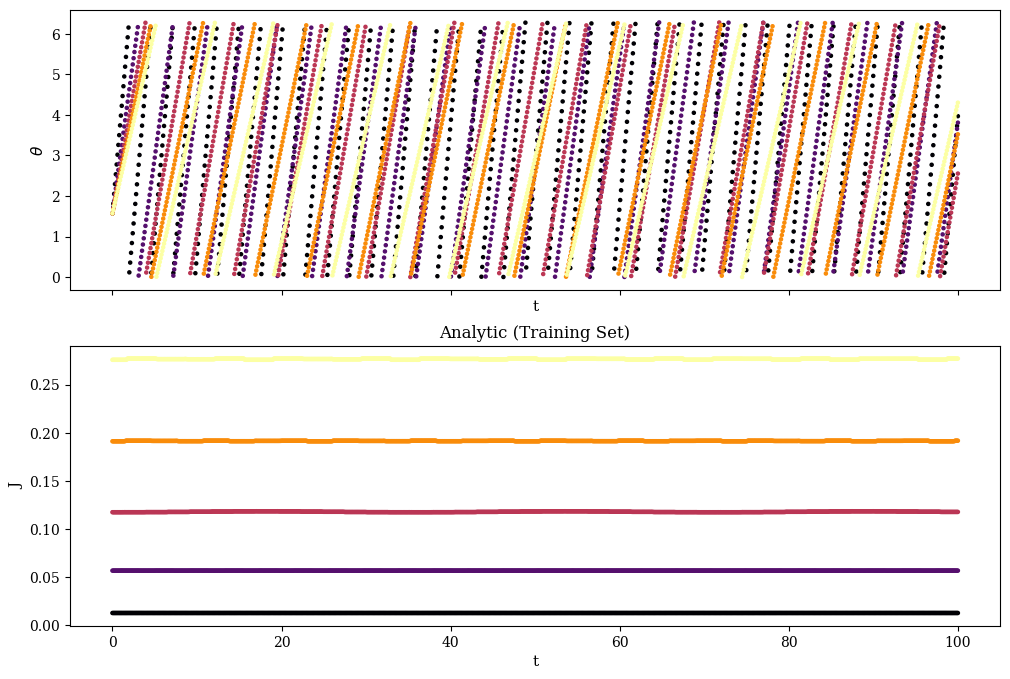

In [3]:
# Load the tensors from the file

# load data
data_filename = 'iso_disk_5_orbs'
loaded_data = DataLoader(data_filename, relative_path="")
potential = IsothermalDiskPotential(amp=loaded_data.potential_values['_amp'], sigma=loaded_data.potential_values['_sigma2']**0.5)
ps = loaded_data.ps
aa_correct = loaded_data.aa

# to find the dictionary key words for the potential argument, check the json file associated with the data located in the same directory.
potential = IsothermalDiskPotential(amp=loaded_data.potential_values['_amp'], sigma=loaded_data.potential_values['_sigma2']**0.5)
aAV = actionAngleVertical(pot=potential)

plot_aa(loaded_data.n_orbits, aa_correct, color_kwargs={'ps':ps, 'potential_for_H':potential}, t_end = loaded_data.t_ls[-1], n_steps = len(loaded_data.t_ls))

/tmp/ipykernel_2991332/3205969765.py:4: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647406761/work/aten/src/ATen/native/TensorShape.cpp:3683.)
  ax[0].scatter(ps[:,0], ps[:,1], c = H(ps, potential).T, s=5, cmap='inferno')



(0.0, 0.38)

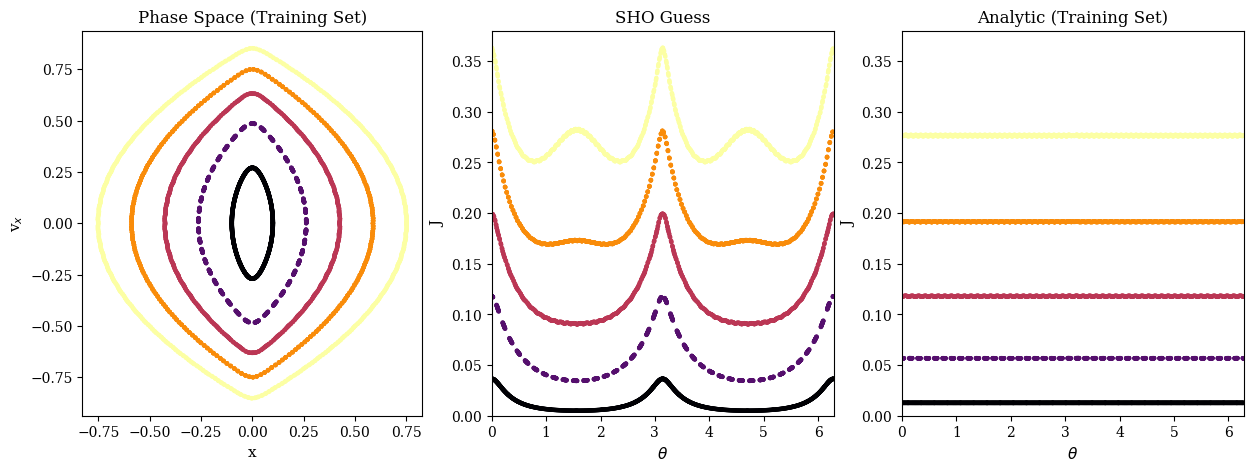

In [4]:
aa_guess = guess_aa_pair(ps)

fig, ax = plt.subplots(1, 3, figsize = (15, 5), sharex=False, sharey=False)
ax[0].scatter(ps[:,0], ps[:,1], c = H(ps, potential).T, s=5, cmap='inferno')
ax[1].scatter(aa_guess[:,0], aa_guess[:,1], c = H(ps, potential).T, s=5, cmap='inferno')
ax[2].scatter(aa_correct[:,0], aa_correct[:,1], c = H(ps, potential).T, s=5, cmap='inferno')
ax[0].set_aspect('equal')

ax[0].set_title('Phase Space (Training Set)', fontsize=12)
ax[0].set_xlabel('x', fontsize=11)
ax[0].set_ylabel('v$_x$', fontsize=11)

ax[1].set_title('SHO Guess', fontsize=12)
ax[1].set_xlabel('$\\theta$', fontsize=11)
ax[1].set_ylabel('J', fontsize=11)
ax[1].set_xlim(0, 2*np.pi)
ax[1].set_ylim(0,0.38)

ax[2].set_title('Analytic (Training Set)', fontsize=12)
ax[2].set_xlabel('$\\theta$', fontsize=11)
ax[2].set_ylabel('J', fontsize=11)
ax[2].set_xlim(0, 2*np.pi)
ax[2].set_ylim(0,0.38)

# Training

## Train without save

In [5]:
iso_loss_polar_10 = polar_train(aa_guess, aa_correct, iso_flow_polar_10, n_epochs, potential=potential, batch_size=100, lr=1e-4, anim=False,  output_freq=10, plot=True, plotcolor=True, saveModel=False, ps=ps, potential_for_H=potential)

Added flow to gpu.


  0%|          | 0/100 [00:00<?, ?it/s]


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat2 in method wrapper_CUDA_mm)

## Train and Save

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Loss: 0.0004876344173680991


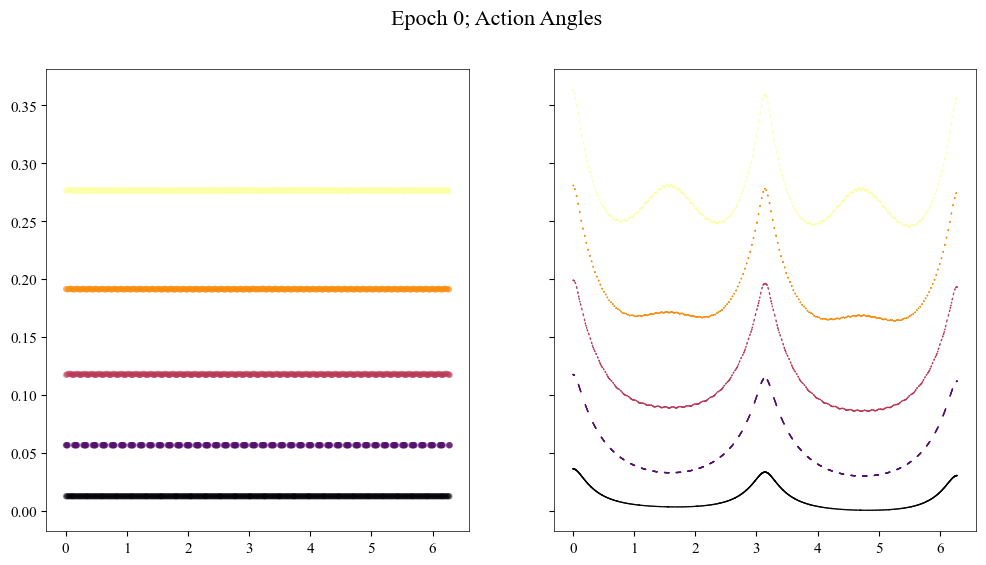

 10%|█         | 10/100 [00:01<00:14,  6.29it/s]

Epoch 10, Loss: 0.00045582864549942315


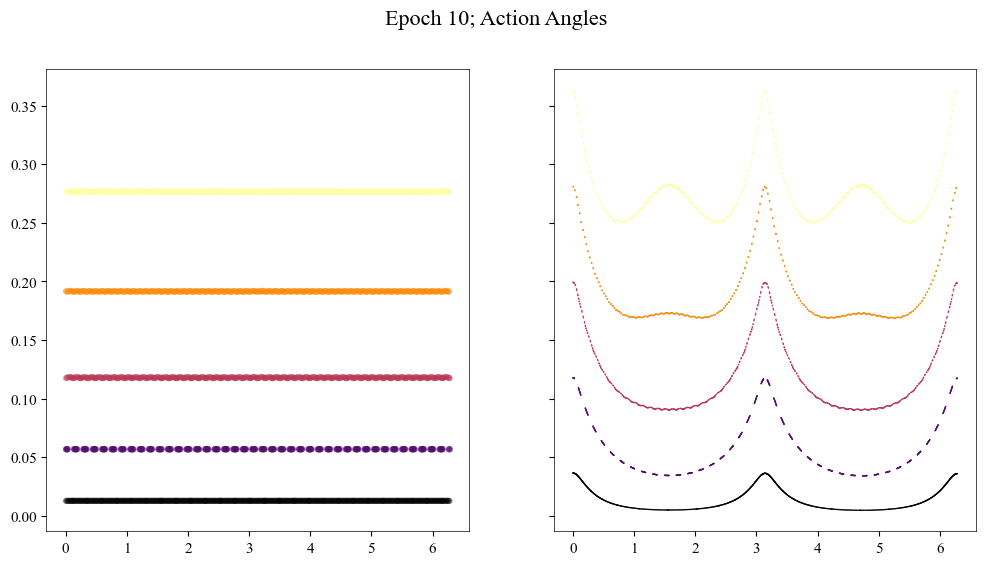

 20%|██        | 20/100 [00:03<00:12,  6.61it/s]

Epoch 20, Loss: 0.0005125791649334133


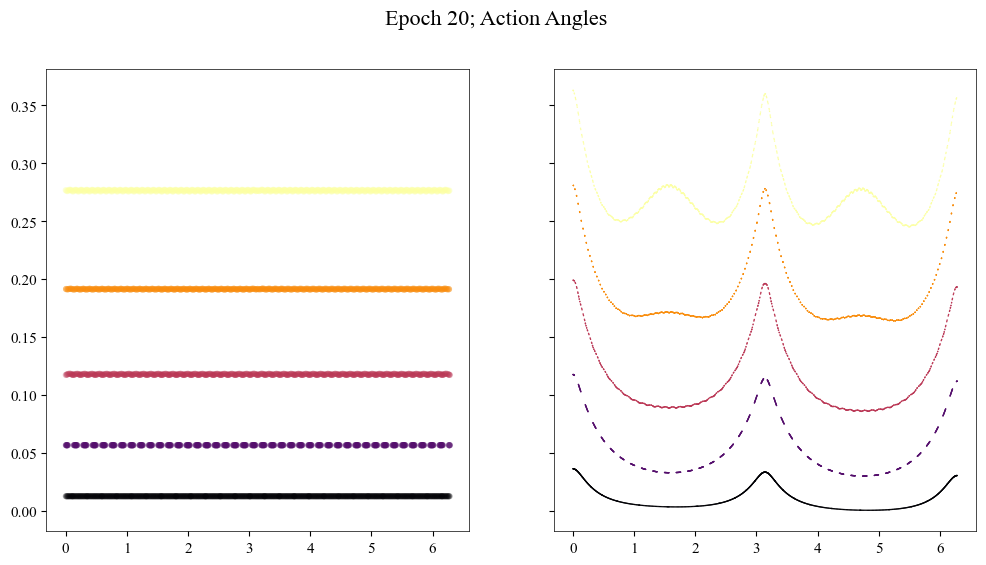

 30%|███       | 30/100 [00:05<00:10,  6.73it/s]

Epoch 30, Loss: 0.00035745330387726426


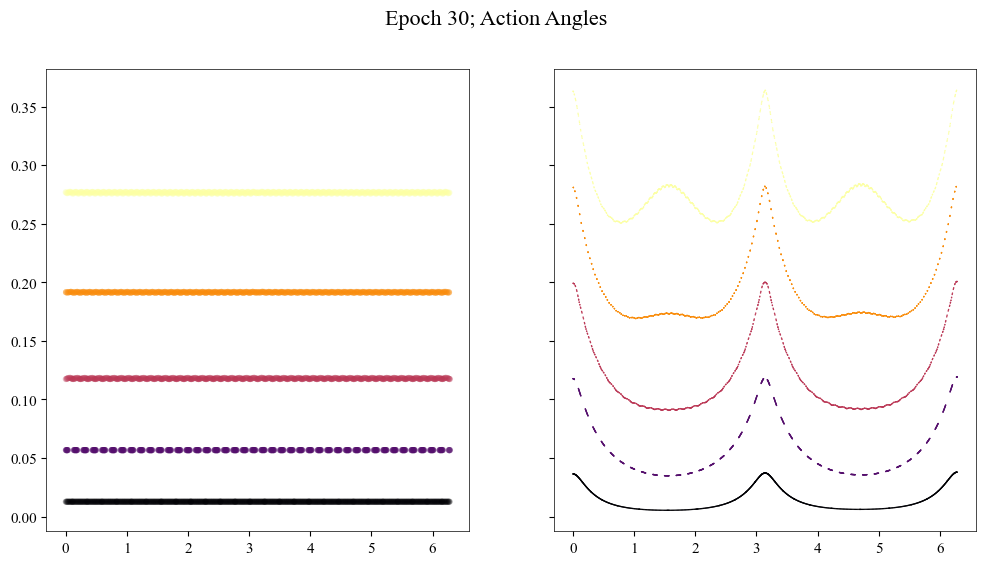

 40%|████      | 40/100 [00:06<00:08,  6.71it/s]

Epoch 40, Loss: 0.00035541015677154064


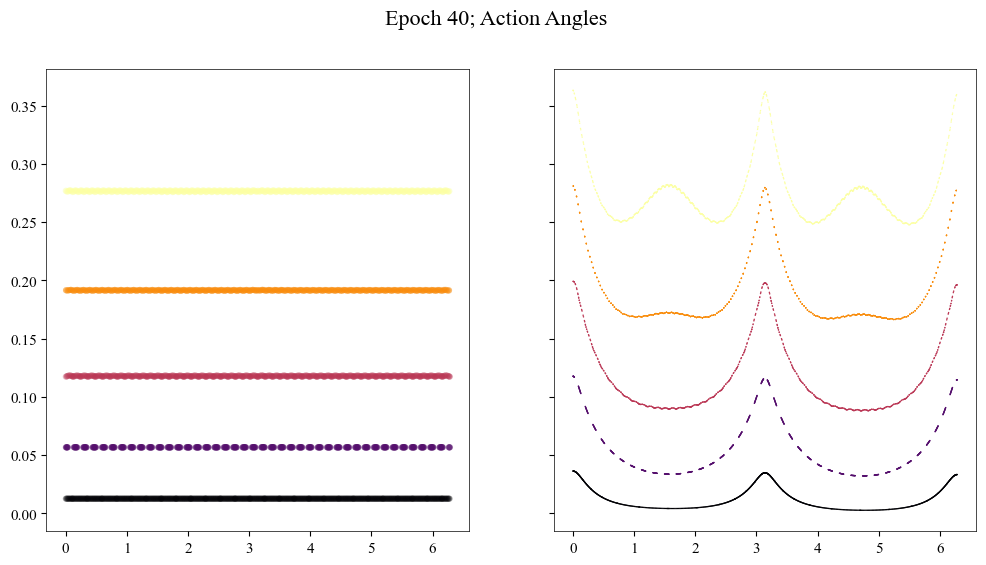

 50%|█████     | 50/100 [00:08<00:07,  6.82it/s]

Epoch 50, Loss: 0.00041745990165509284


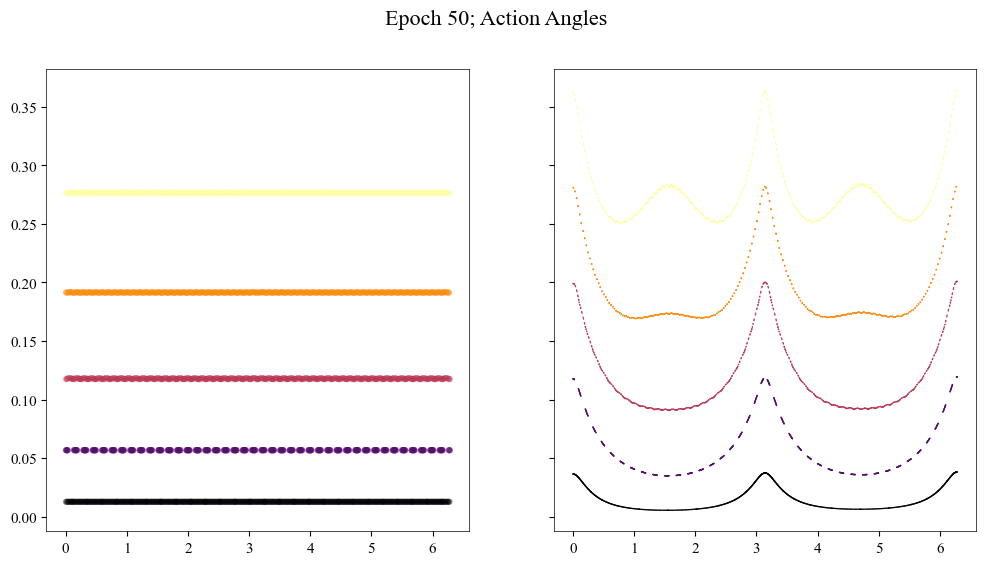

 60%|██████    | 60/100 [00:10<00:05,  6.91it/s]

Epoch 60, Loss: 0.0005524029838852584


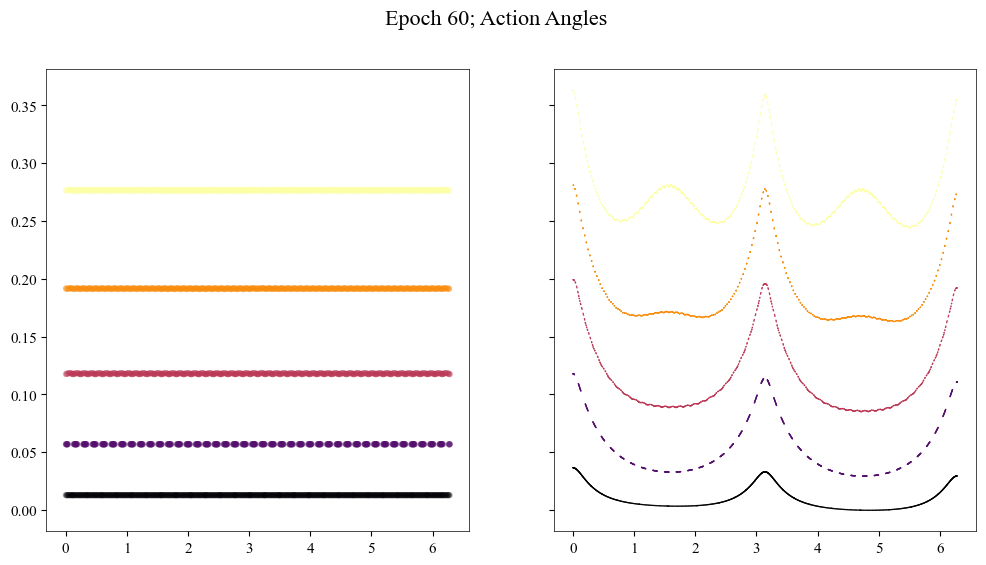

 70%|███████   | 70/100 [00:11<00:04,  6.95it/s]

Epoch 70, Loss: 0.00034814863465726376


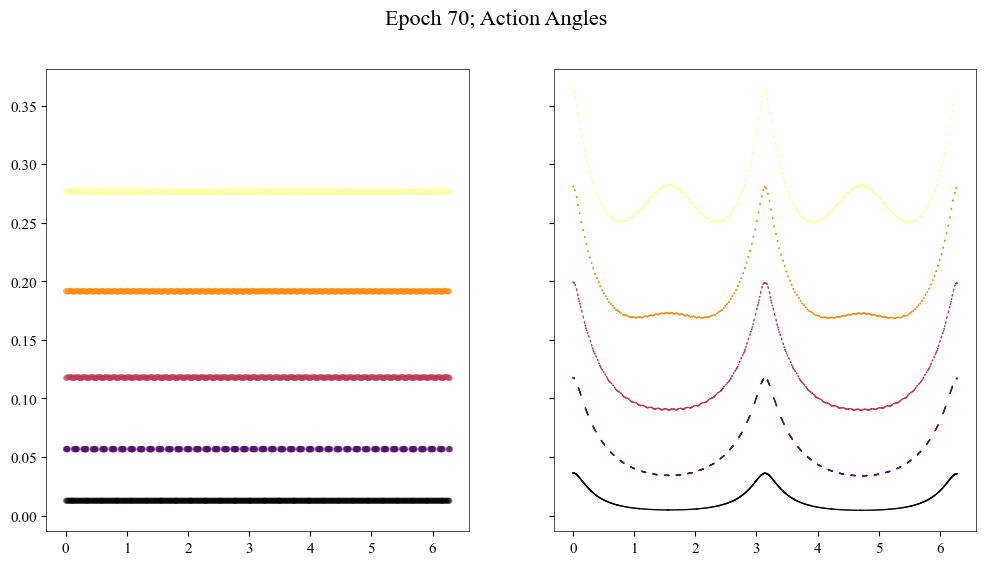

 80%|████████  | 80/100 [00:13<00:02,  6.99it/s]

Epoch 80, Loss: 0.0004027691902592778


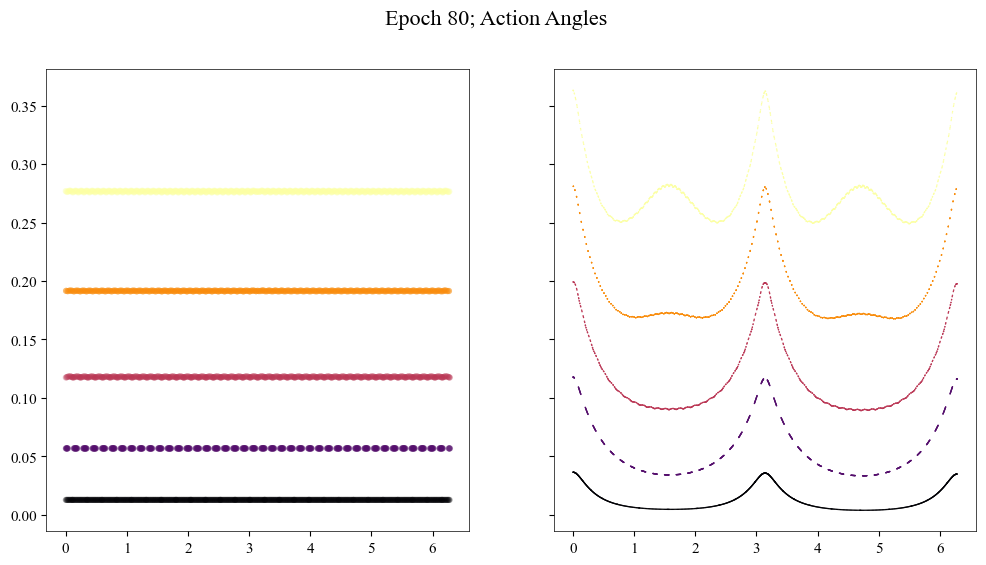

 90%|█████████ | 90/100 [00:14<00:01,  6.88it/s]

Epoch 90, Loss: 0.00039132495294325054


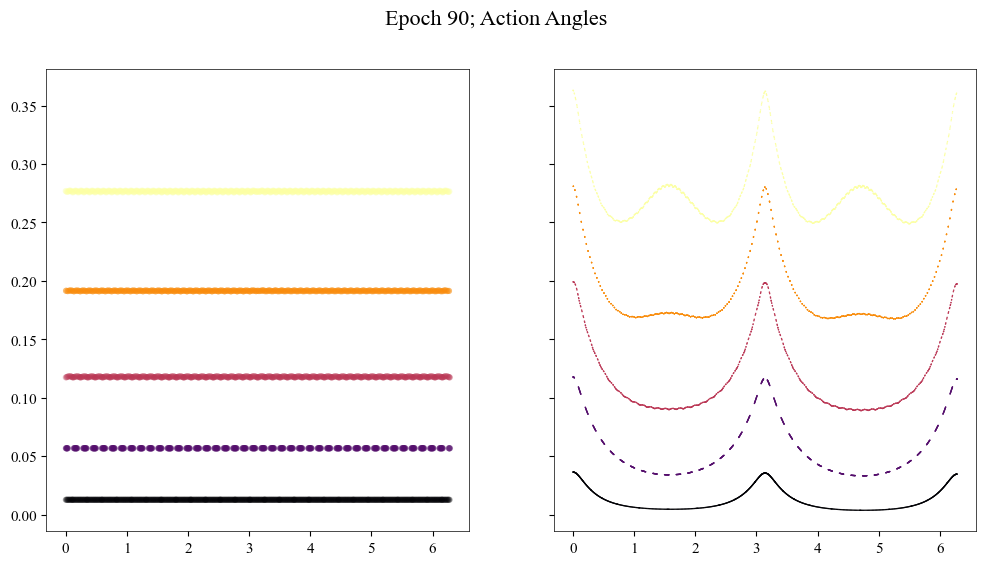

100%|██████████| 100/100 [00:16<00:00,  6.09it/s]

Model saved to /Users/gabrielpfaffman/Repos/NF_Action_Angles/nfaa/trained_models/iso_disk_5_orbs_test/iso_disk_5_orbs_test.pt
Configuration saved to /Users/gabrielpfaffman/Repos/NF_Action_Angles/nfaa/trained_models/iso_disk_5_orbs_test/iso_disk_5_orbs_test_config.json


In [ ]:
filename = 'iso_disk_5_orbs_test'
iso_flow_polar_10_saved = GsympNetFlow(input_dim, hidden_dim, num_layers)
iso_loss_polar_10 = polar_train(aa_guess, aa_correct, iso_flow_polar_10_saved, n_epochs, z=ps, potential=potential, batch_size=100, lr=1e-4, anim=False, filename=filename, output_freq=10, plot=True, plotcolor=True, saveModel=True, training_data_name=data_filename)

# Load Model

In [ ]:
from nflows import ModelLoader

In [ ]:
filename = 'iso_disk_5_orbs_test'
model = ModelLoader(filename, relative_path="../trained_models/")

/Users/gabrielpfaffman/Repos/NF_Action_Angles/nfaa/nflows/funct/load.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f'{relative

In [ ]:
model.flow

GsympNetFlow(
  (layers): ModuleList(
    (0-9): 10 x SymplecticCouplingLayer(
      (conditioner): GradientBasedConditioner()
    )
  )
)

In [ ]:
# check that the models match

model.flow(aa_guess) - iso_flow_polar_10_saved(aa_guess)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]], grad_fn=<SubBackward0>)

In [ ]:
model.loss_list

array([0.00048763, 0.00050682, 0.00045435, 0.00031048, 0.00039112,
       0.00036834, 0.00039265, 0.00041968, 0.00047022, 0.0004056 ,
       0.00045583, 0.00053449, 0.00051725, 0.00034669, 0.00053193,
       0.00062699, 0.00033493, 0.00051131, 0.00044088, 0.0005441 ,
       0.00051258, 0.00034574, 0.00045333, 0.00044137, 0.00042101,
       0.00035347, 0.00037715, 0.00040538, 0.00027198, 0.00045074,
       0.00035745, 0.00038697, 0.00045299, 0.00052255, 0.0004731 ,
       0.00043882, 0.0004242 , 0.00056521, 0.00040959, 0.00030799,
       0.00035541, 0.00034935, 0.00052417, 0.00051741, 0.00047906,
       0.00046047, 0.00042776, 0.0003164 , 0.00044986, 0.00062748,
       0.00041746, 0.00042338, 0.00057889, 0.00036689, 0.00037551,
       0.00044012, 0.00043884, 0.00038779, 0.00043169, 0.00038209,
       0.0005524 , 0.00063688, 0.00035722, 0.00039981, 0.00051609,
       0.00052207, 0.00040195, 0.00047525, 0.00041852, 0.00046648,
       0.00034815, 0.00040782, 0.00043317, 0.0004332 , 0.00037